# ***stroke***
A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.

**objective** is to understand what are the reasons that cause stroke to peoeple and see if we can succefully detect stroke on some features using ML technics.

**Who is of people at risk for a stroke?**

# Import libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

## Load Dataset

In [ ]:
#i will load data from google drive
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Data Loading,read the DS
dataset = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
#show head of dataset
dataset.head()

id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]

In [ ]:
#show tail of dataset
dataset.tail()

id  gender   age  ...   bmi   smoking_status stroke
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5 rows x 12 columns]

# Explore Data Analysis

In [ ]:
# get some info about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


from info i get more information about my data ,sutch as the name, number of columns,,data type, and null values.at stroke dataset we have null values in bmi feature .

In [ ]:
#describe DS
dataset.describe()

id          age  ...          bmi       stroke
count   5110.000000  5110.000000  ...  4909.000000  5110.000000
mean   36517.829354    43.226614  ...    28.893237     0.048728
std    21161.721625    22.612647  ...     7.854067     0.215320
min       67.000000     0.080000  ...    10.300000     0.000000
25%    17741.250000    25.000000  ...    23.500000     0.000000
50%    36932.000000    45.000000  ...    28.100000     0.000000
75%    54682.000000    61.000000  ...    33.100000     0.000000
max    72940.000000    82.000000  ...    97.600000     1.000000

[8 rows x 7 columns]

In [ ]:
# detect how many rows and columns
dataset.shape

(5110, 12)

In [ ]:
#check the null value
dataset.isnull().sum() # bmi feature has 201 null value

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Check if we have duplicate values by using 'id' feature
dataset[dataset.duplicated(['id'])]


Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

the bmi feature has 201 null value .

In [ ]:
#get % null value from dataset
dataset.isna().sum()/dataset.shape[0]

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
#sace copy from data set and work on it
df = dataset.copy()

In [ ]:
df

id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]

# Data Cleaning

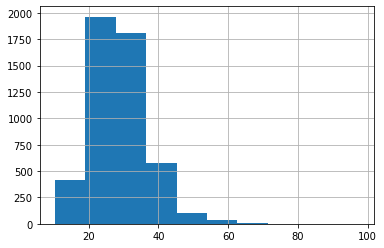

In [ ]:
#show bmi value as hist vesualisation
df.bmi.hist()

In [ ]:
#i will handle this missing values by using median
df.bmi.fillna(df.bmi.median(),inplace=True)

In [ ]:
#check the missing value after handling
df.isnull().sum()
#filled with the median of the same column. For feature extraction

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#check stroke values preprosse
df.stroke.value_counts()
##at this DS it have imbalanced data ,where the value of patient doesn't have Stroke =4861,patient have stoke only =249.

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
#i will drop id column becuse it dosen't help me on analysis DS
df=df.drop('id',axis=1)
df.head(2)

gender   age  hypertension  ...   bmi   smoking_status stroke
0    Male  67.0             0  ...  36.6  formerly smoked      1
1  Female  61.0             0  ...  28.1     never smoked      1

[2 rows x 11 columns]

# visualization

In [ ]:
!pip install dataprep

# Restart the runtime 

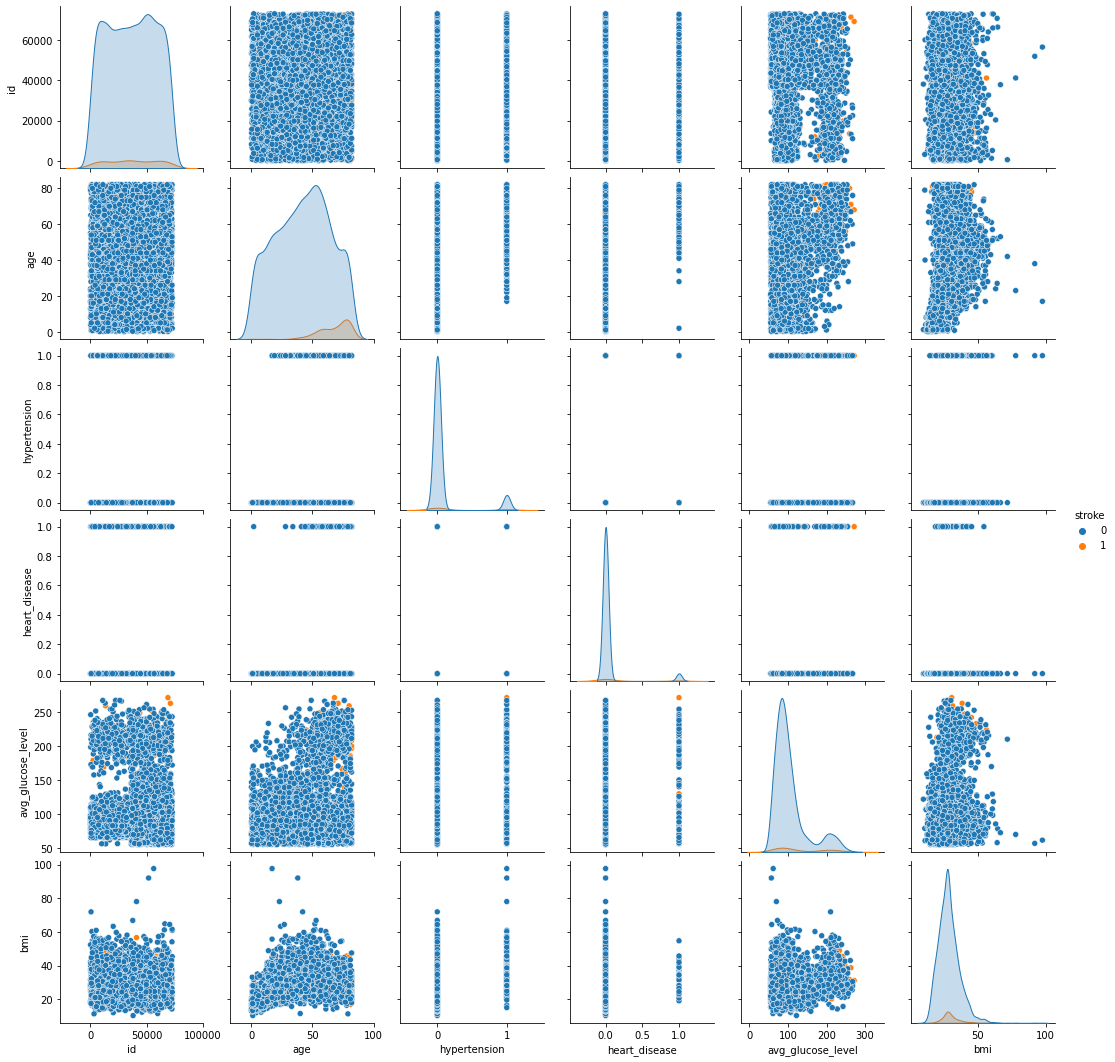

In [ ]:
sns.pairplot(df,diag_kind='kde',hue='stroke')


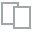
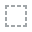
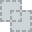
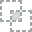
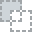
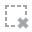
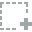
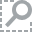
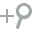
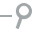
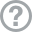
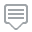
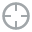
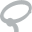
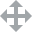
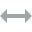
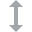
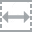
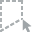
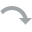
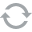
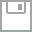
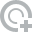
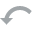
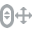
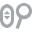
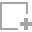
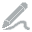
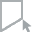
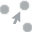
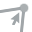
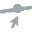

In [ ]:
#Distribution of Targets
from dataprep.eda import plot
plot(df, 'stroke')#From distribution it is clear dataset has highly unbalanced data distribution.

Who is more susceptible to infection stroke , women or men?




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


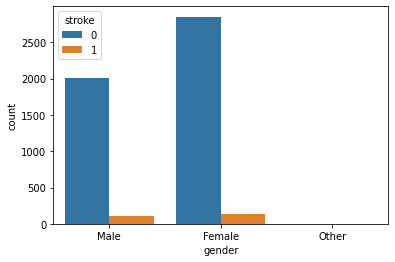

In [ ]:
# which gender is the most infection to stroke
sns.countplot(df.gender,hue='stroke',data=df)

From the figure above, I think that men have a higher risk of stroke than women.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


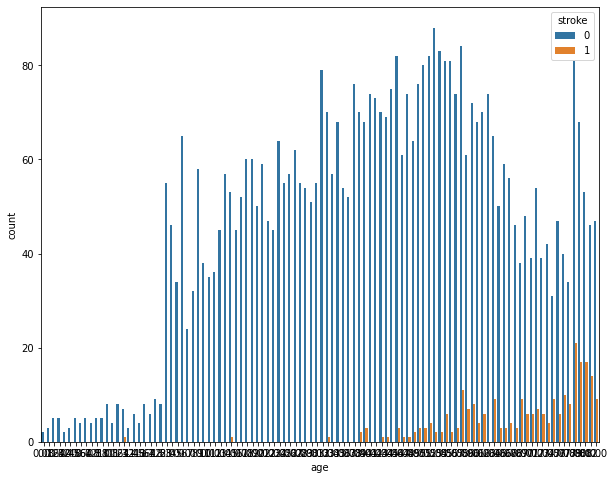

In [ ]:
#How does age affect stroke risk?
plt.figure(figsize=[10,8])
sns.countplot(df.age,hue='stroke',data=df)

From age features it can be seen that old age people are mostly having strokes, compared to younger ones.


>Does smoking affect strokes?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


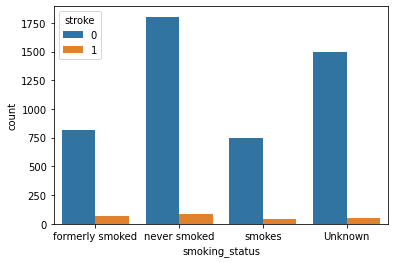

In [ ]:
# How does smoke affect stroke risk?
sns.countplot(df.smoking_status,hue='stroke',data=df)

As we can see, excessive smoking may increase the risk of stroke.

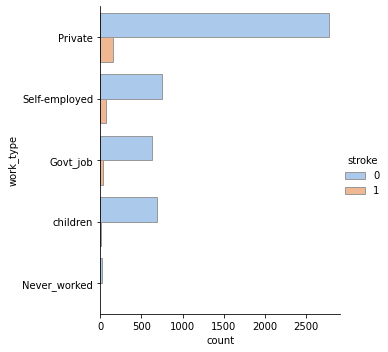

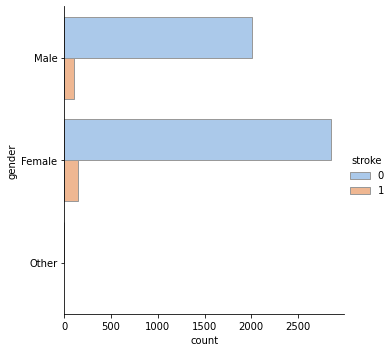

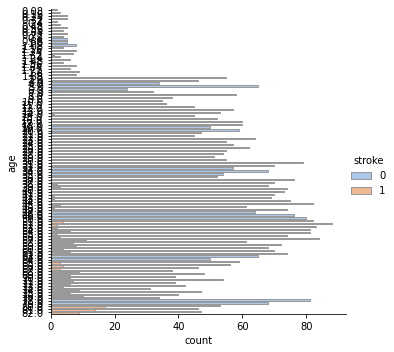

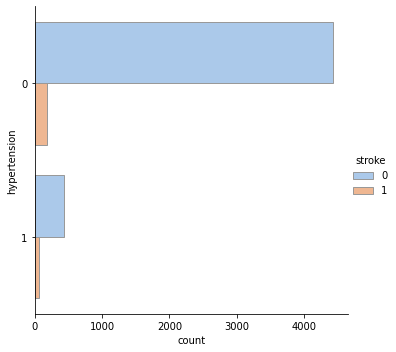

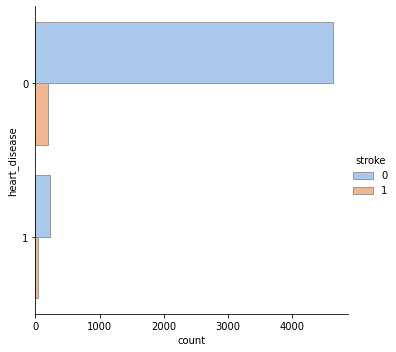

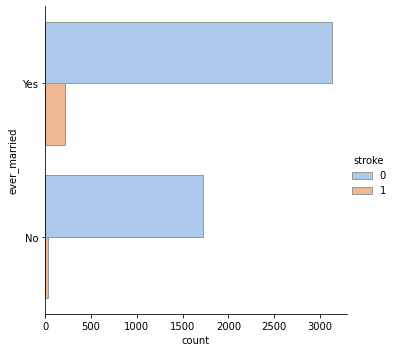

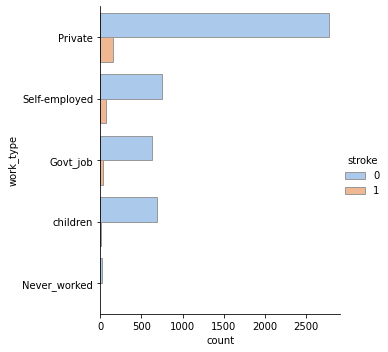

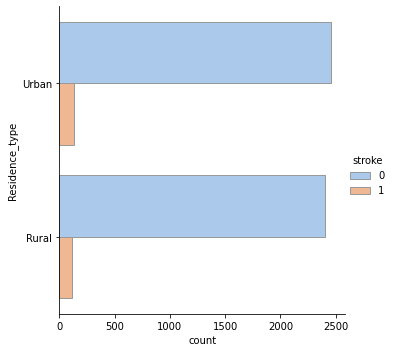

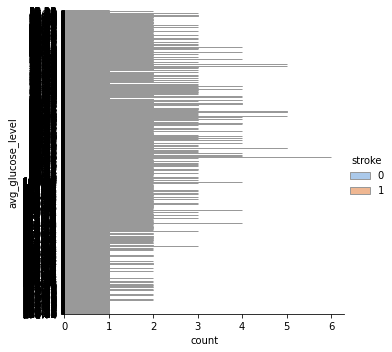

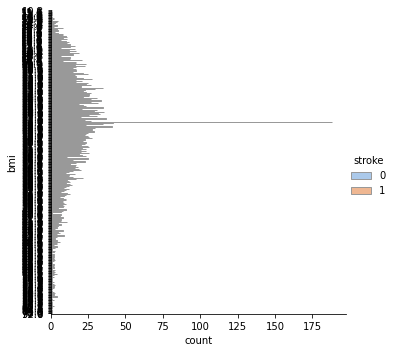

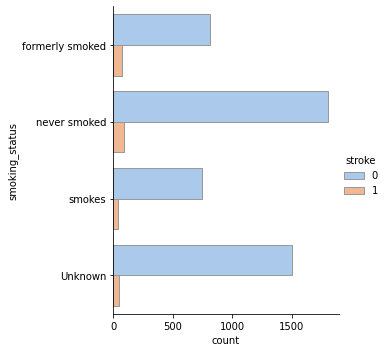

In [ ]:
#data visualization for each features with "stroke" feature
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

sns.catplot(y="gender", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

sns.catplot(y="age", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

sns.catplot(y="hypertension", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

sns.catplot(y="heart_disease", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
sns.catplot(y="ever_married", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
sns.catplot(y="Residence_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
sns.catplot(y="avg_glucose_level", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

sns.catplot(y="bmi", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)



# preprocessing for modeling

In [ ]:
#label encoder
# Convert each of ' Gender,Residence_type and Marrital Status' into 0 & 1
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df

gender   age  hypertension  ...   bmi   smoking_status stroke
0          1  67.0             0  ...  36.6  formerly smoked      1
1          0  61.0             0  ...  28.1     never smoked      1
2          1  80.0             0  ...  32.5     never smoked      1
3          0  49.0             0  ...  34.4           smokes      1
4          0  79.0             1  ...  24.0     never smoked      1
...      ...   ...           ...  ...   ...              ...    ...
5105       0  80.0             1  ...  28.1     never smoked      0
5106       0  81.0             0  ...  40.0     never smoked      0
5107       0  35.0             0  ...  30.6     never smoked      0
5108       1  51.0             0  ...  25.6  formerly smoked      0
5109       0  44.0             0  ...  26.2          Unknown      0

[5110 rows x 11 columns]

In [ ]:
#label encoder
#i will use OneHot encoding for smoking_status, work_type coulmns.
data_dummies = df[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)


In [ ]:
#remove tha 'smoking_status,work_type' features and reblace it with dummies coulmns

df.drop(columns=['smoking_status','work_type'],inplace=True)
print("data_dummies")
df.merge(data_dummies,left_index=True, right_index=True,how='left')

data_dummies


gender   age  ...  work_type_Self-employed  work_type_children
0          1  67.0  ...                        0                   0
1          0  61.0  ...                        1                   0
2          1  80.0  ...                        0                   0
3          0  49.0  ...                        0                   0
4          0  79.0  ...                        1                   0
...      ...   ...  ...                      ...                 ...
5105       0  80.0  ...                        0                   0
5106       0  81.0  ...                        1                   0
5107       0  35.0  ...                        1                   0
5108       1  51.0  ...                        0                   0
5109       0  44.0  ...                        0                   0

[5110 rows x 18 columns]

# Split Data

In [ ]:
# detect input and output
X = df.drop('stroke',axis=1)
y = df.stroke
print(X.shape)
print(y.shape)

(5110, 8)
(5110,)


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088, 8)
(4088,)
(1022, 8)
(1022,)


In [ ]:
# the dataset is embalanced, I will use SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
print("The number of classes before fit {}".format(Counter(y_train)))

smot =SMOTETomek()
X_train,y_train = smot.fit_resample(X_train,y_train)
print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes before fit Counter({0: 3901, 1: 187})
The number of classes after fit Counter({0: 3839, 1: 3839})


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("X_test_scaled:   ", X_test_scaled)
print("X_train_scaled:  ",X_train_scaled)

X_test_scaled:    [[ 1.49154132 -1.08956519 -0.29429907 ... -0.83879212 -0.99737917
  -0.9620194 ]
 [ 1.49154132 -0.68359349 -0.29429907 ... -0.83879212 -0.98916124
  -0.16595327]
 [-0.6704474  -2.12704842 -0.29429907 ...  1.1921905  -0.81863918
  -1.03711998]
 ...
 [ 1.49154132 -0.2776218   3.39790401 ... -0.83879212  0.01958972
   0.14946916]
 [-0.6704474   0.03813397 -0.29429907 ...  1.1921905   0.1938472
  -0.6766372 ]
 [ 1.49154132  1.03050923  3.39790401 ... -0.83879212 -0.22115828
  -0.31615443]]
X_train_scaled:   [[ 1.49154132  1.0756172  -0.29429907 ... -0.83879212 -0.10479986
  -0.13591304]
 [-0.6704474   0.30878177 -0.29429907 ...  1.1921905  -0.55902729
   1.03565599]
 [-0.6704474  -1.54064486 -0.29429907 ... -0.83879212 -1.09692819
   0.64513298]
 ...
 [ 1.49154132  0.96575358 -0.29429907 ...  1.1921905   0.97805488
   0.02227536]
 [-0.6704474   0.92704553 -0.29429907 ...  1.1921905  -0.20267287
  -0.1959935 ]
 [-0.6704474   0.01847634 -0.29429907 ... -0.83879212 -0.473256

# Modeling

In [ ]:
# apply logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test_scaled)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       778
           1       0.65      0.16      0.26       244

    accuracy                           0.78      1022
   macro avg       0.72      0.57      0.57      1022
weighted avg       0.75      0.78      0.72      1022



In [ ]:
#apply KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       825
           1       0.42      0.13      0.20       197

    accuracy                           0.80      1022
   macro avg       0.62      0.54      0.54      1022
weighted avg       0.74      0.80      0.75      1022



In [ ]:
# applay Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf= RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
y_pred_rf= rf.predict(X_test_scaled)
print(classification_report(y_pred_rf,y_test))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       941
           1       0.23      0.17      0.20        81

    accuracy                           0.89      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.87      0.89      0.88      1022



# Model Evaluation

In [ ]:
#comparing between the models
print("logistic regression:",classification_report(y_pred,y_test))
print("KNN:",classification_report(y_pred_knn,y_test))
print("Random Forest:",classification_report(y_pred_rf,y_test))


logistic regression:               precision    recall  f1-score   support

           0       0.79      0.97      0.87       778
           1       0.65      0.16      0.26       244

    accuracy                           0.78      1022
   macro avg       0.72      0.57      0.57      1022
weighted avg       0.75      0.78      0.72      1022

KNN:               precision    recall  f1-score   support

           0       0.82      0.96      0.88       825
           1       0.42      0.13      0.20       197

    accuracy                           0.80      1022
   macro avg       0.62      0.54      0.54      1022
weighted avg       0.74      0.80      0.75      1022

Random Forest:               precision    recall  f1-score   support

           0       0.93      0.95      0.94       941
           1       0.23      0.17      0.20        81

    accuracy                           0.89      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.87      0.89

by compare the results of the different models, i can say RF have the best result,then KNN model and the last one is logistic regression.



# conclusion

Short summary - if it is important for us to identify all people who may have risk a stroke the best to cope with this task with Random Forest.